# **5. 딥러닝 소개**

아래와 같이 '런타임 유형 변경' 에서 GPU로 바꿔야 딥러닝 하기에 좋음 (빠름)

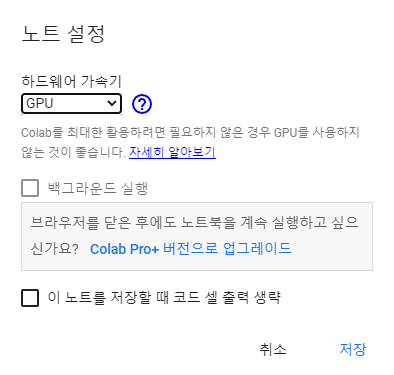

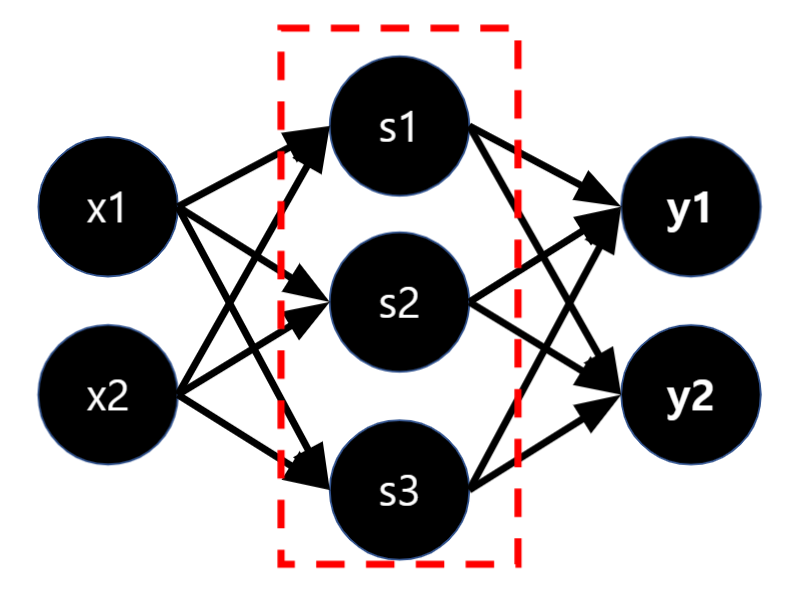

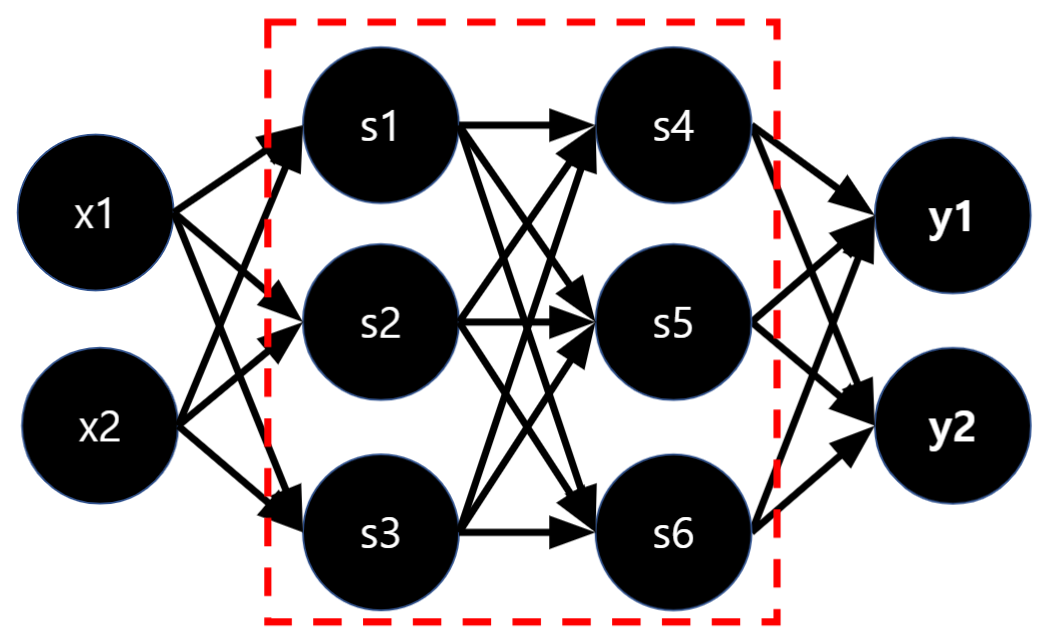

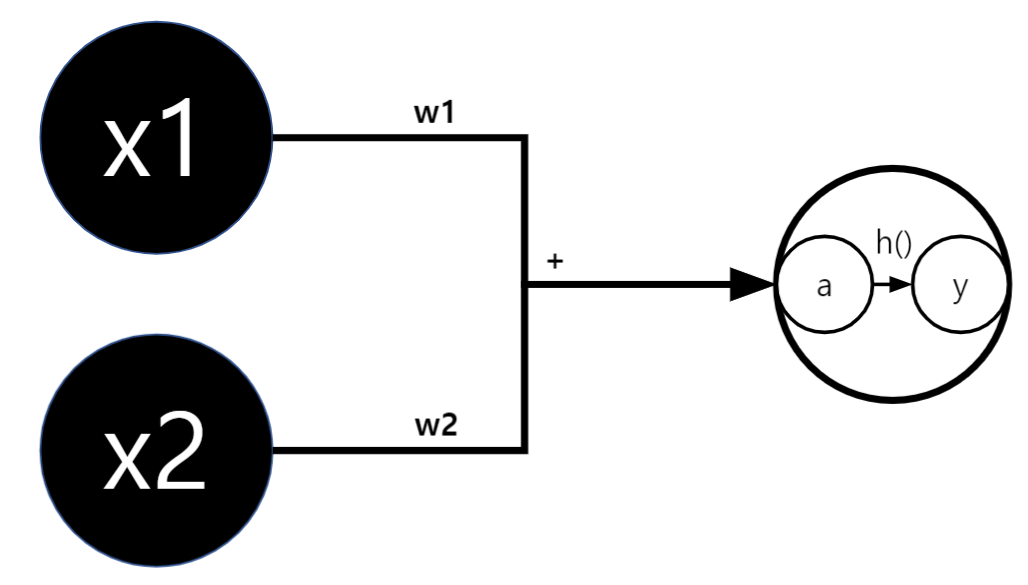

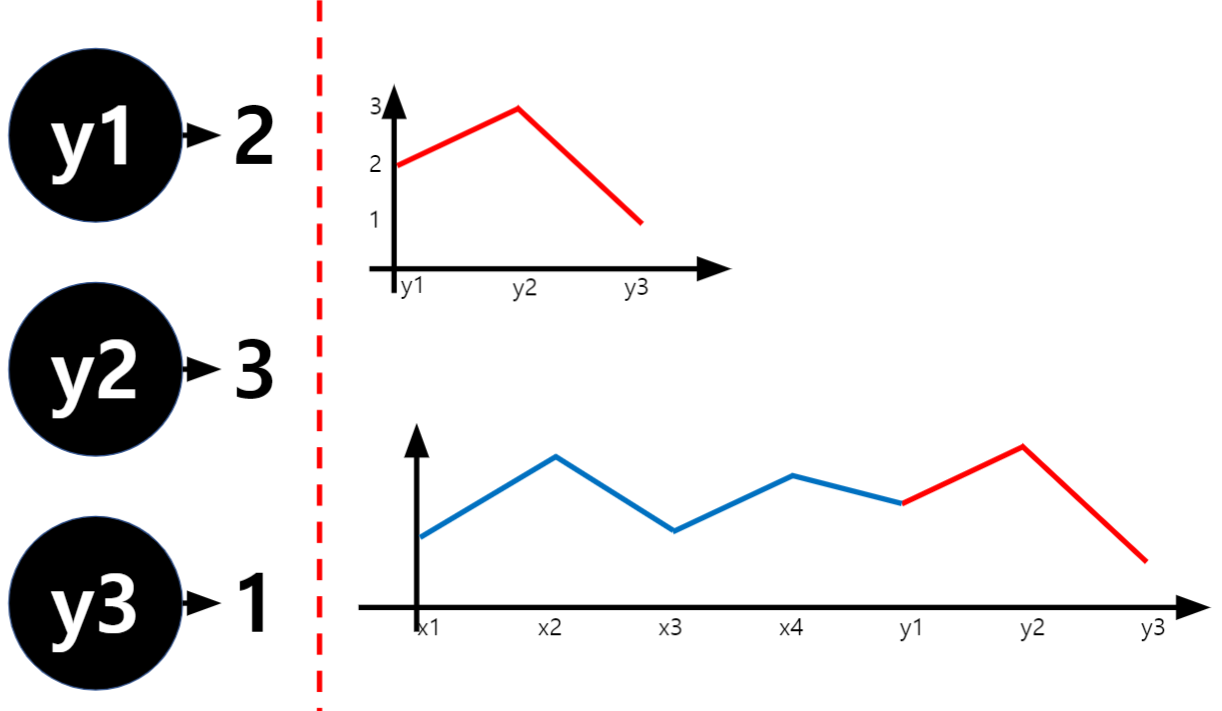

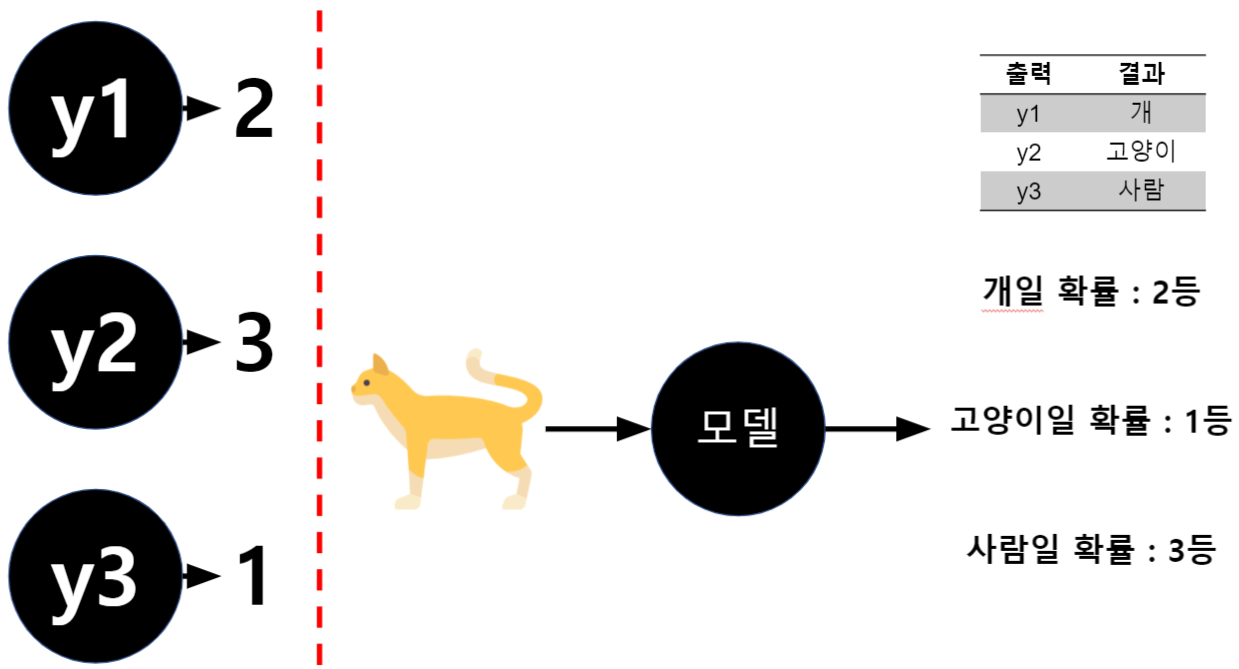

# **6. numpy 를 이용한 행렬 연산**

numpy : 행렬을 만들기 편하게

\- 행렬 생성

In [ ]:
import numpy as np

In [ ]:
a = np.array([[1, 2], [3, 4]])

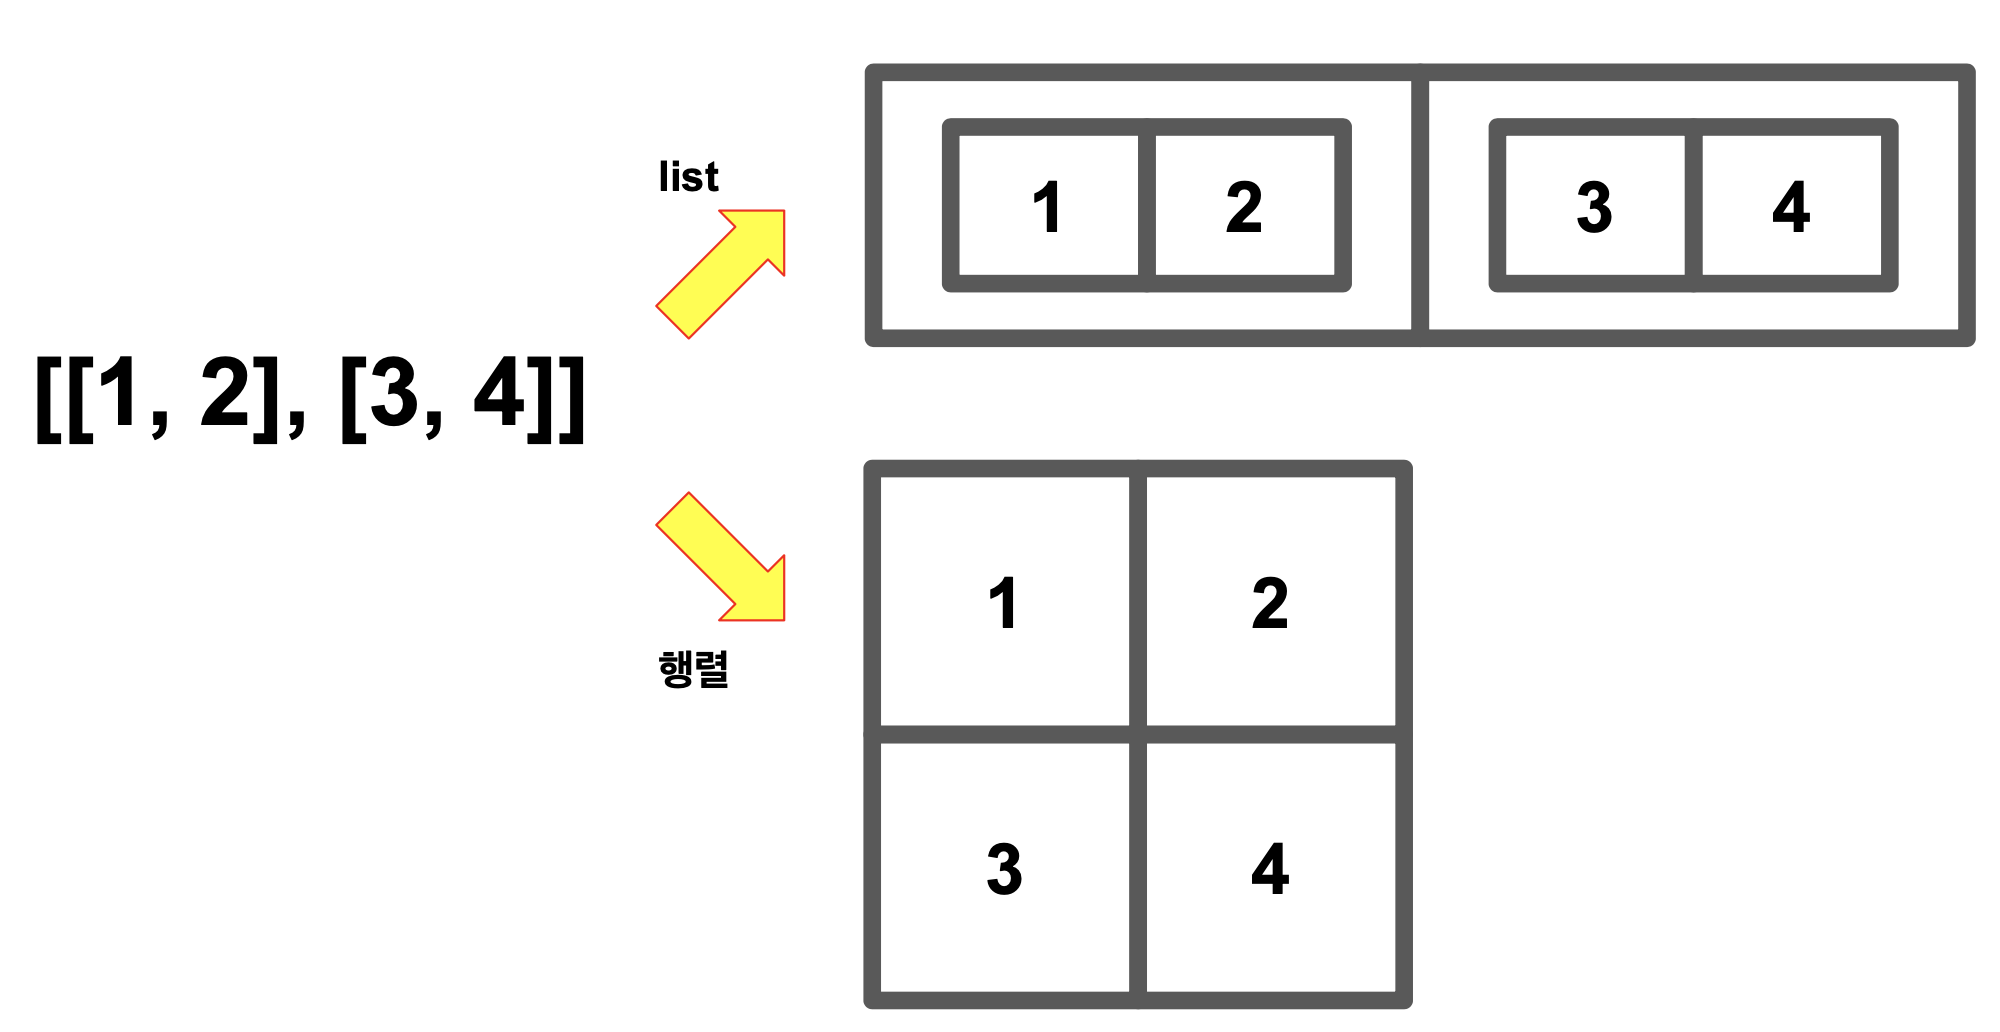

\- 전치 행렬

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])

print(a.T)

[[1 4]
 [2 5]
 [3 6]]


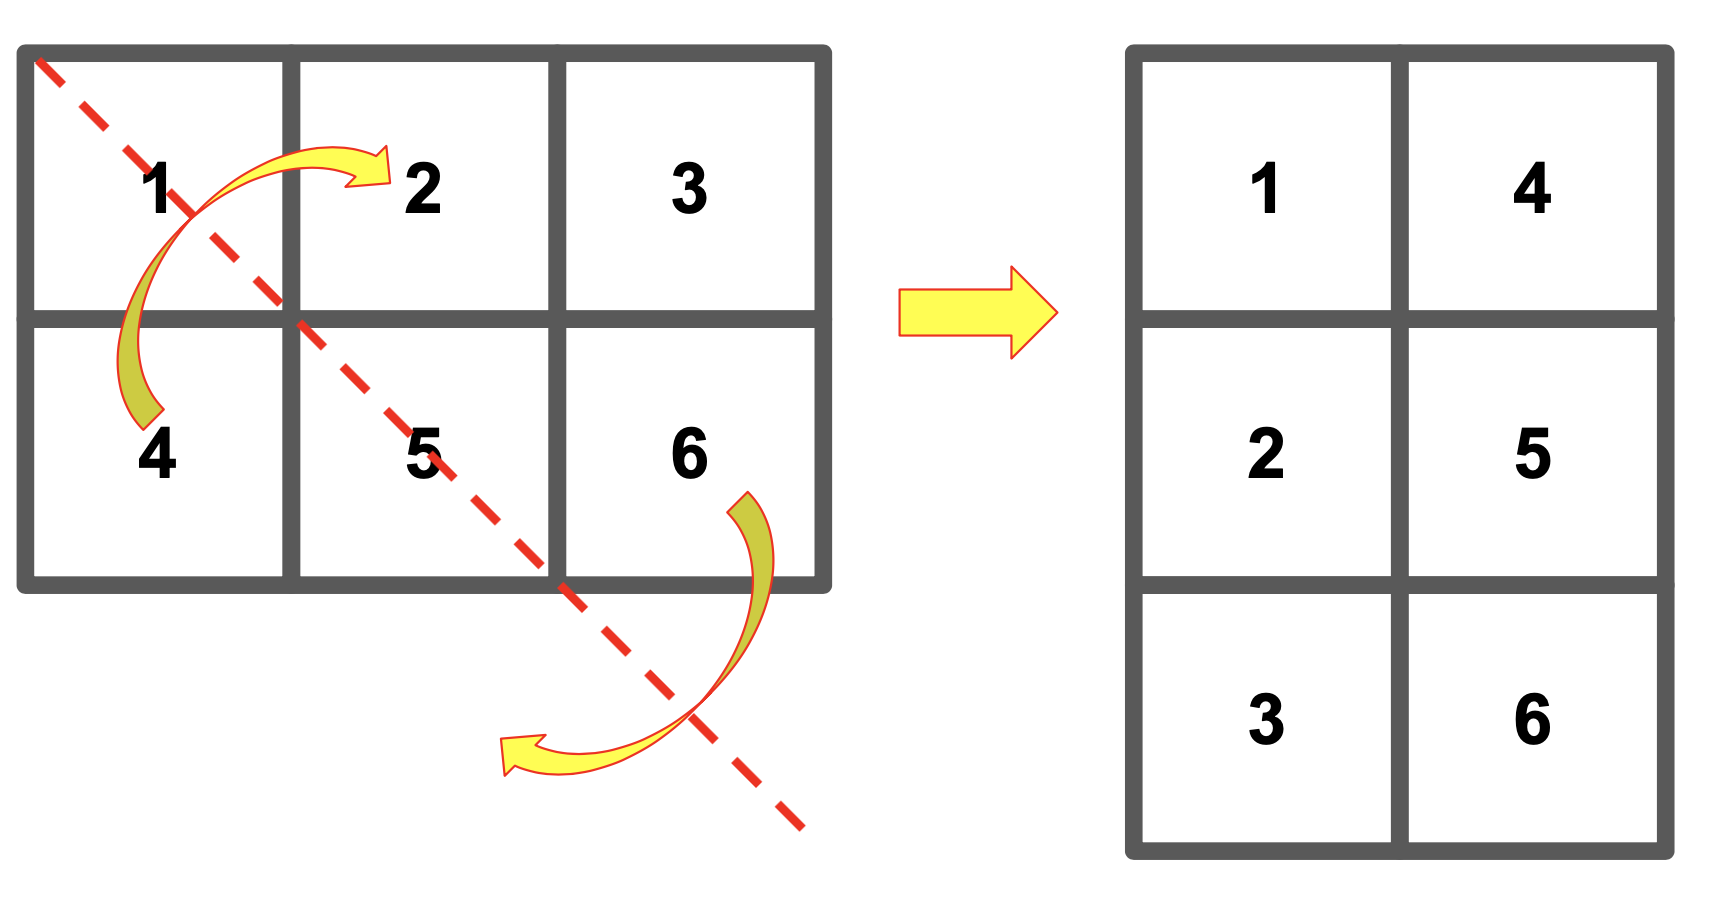

\- 행렬 차원 확인
- 변수.shape

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])

print(a.shape)        # 2행 3열

(2, 3)


\- 행렬 형태 변경

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.reshape(a, (3, 2))     # 3행 2열로 바꾸기

print(b.shape)
print(b)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


\- 배열간 사칙연산

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[2, 3, 4], [5, 6, 7]])

print(a + b)
print(a + 3)

[[ 3  5  7]
 [ 9 11 13]]
[[4 5 6]
 [7 8 9]]


In [ ]:
print(a - b)
print(a - 2)

[[-1 -1 -1]
 [-1 -1 -1]]
[[-1  0  1]
 [ 2  3  4]]


In [ ]:
print(a * b)
print(a * 2)

[[ 2  6 12]
 [20 30 42]]
[[ 2  4  6]
 [ 8 10 12]]


In [ ]:
print(a / b)
print(a / 2)

[[0.5        0.66666667 0.75      ]
 [0.8        0.83333333 0.85714286]]
[[0.5 1.  1.5]
 [2.  2.5 3. ]]


\- **행렬의 형태가 다른 경우에는 불가**

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[2, 3], [5, 6]])

print(a + b)

ValueError: ignored

\- 행렬의 곱셈

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(np.dot(a, b))       # 각 곱의 합

32


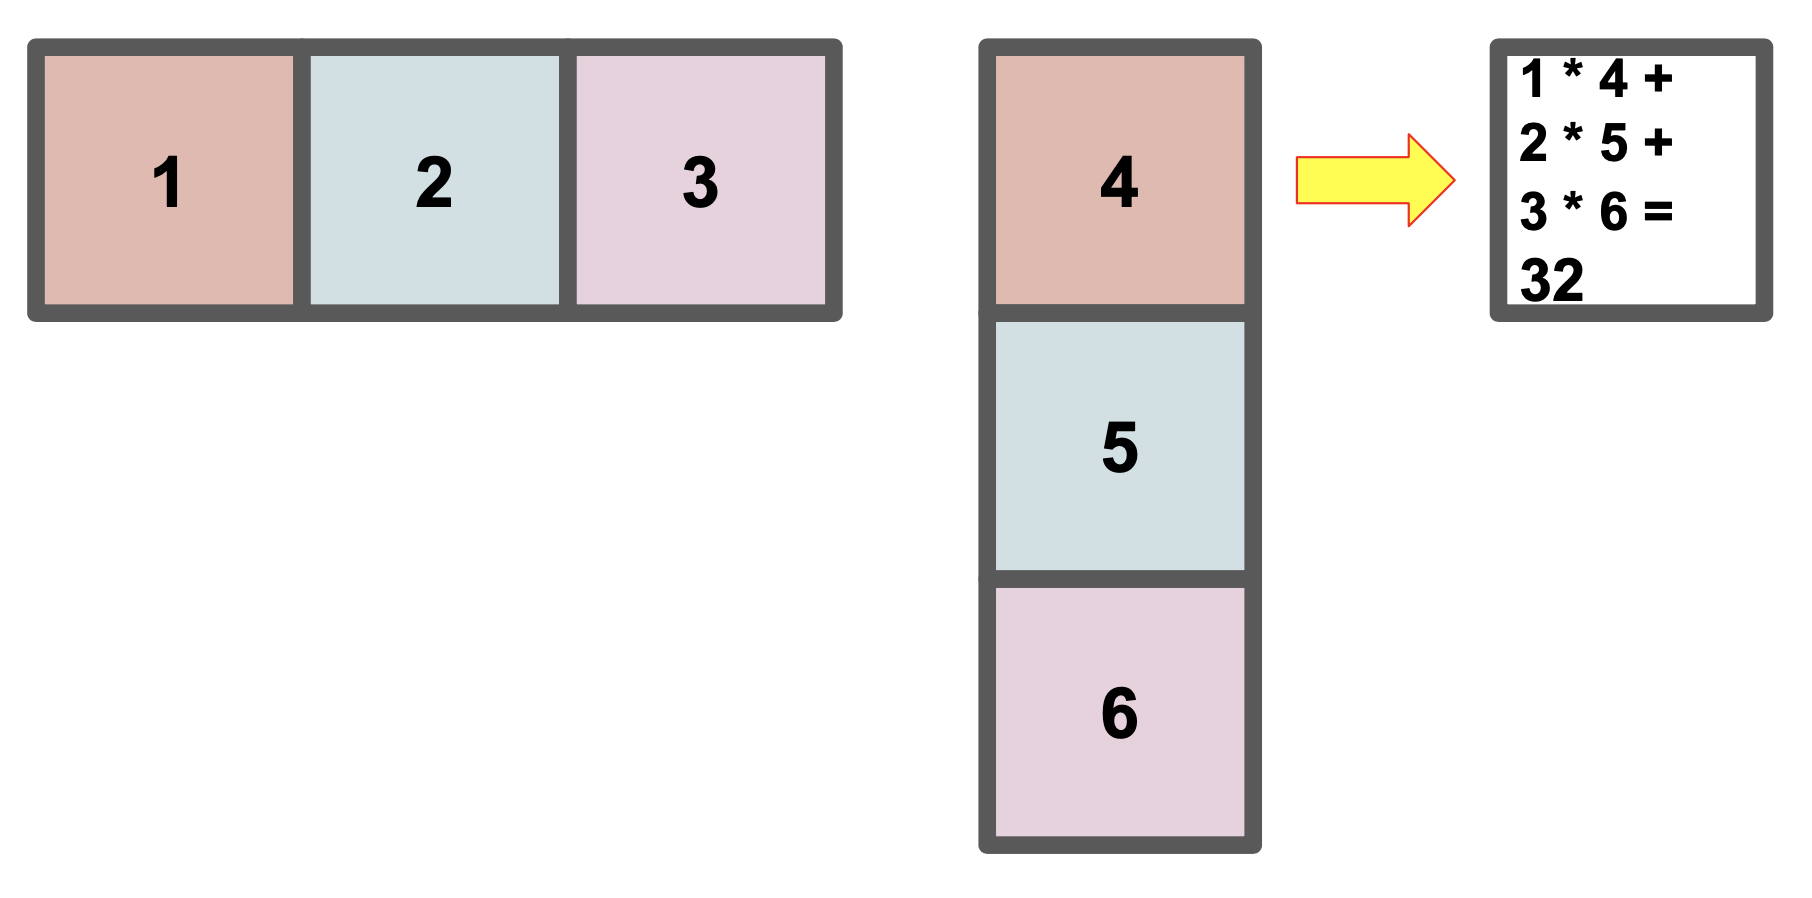

In [ ]:
a = np.array([[1, 2, 3], 
              [4, 5, 6]])
b = np.array([[1, 2],
              [3, 4],
              [5, 6]])

print(np.dot(a, b))

[[22 28]
 [49 64]]


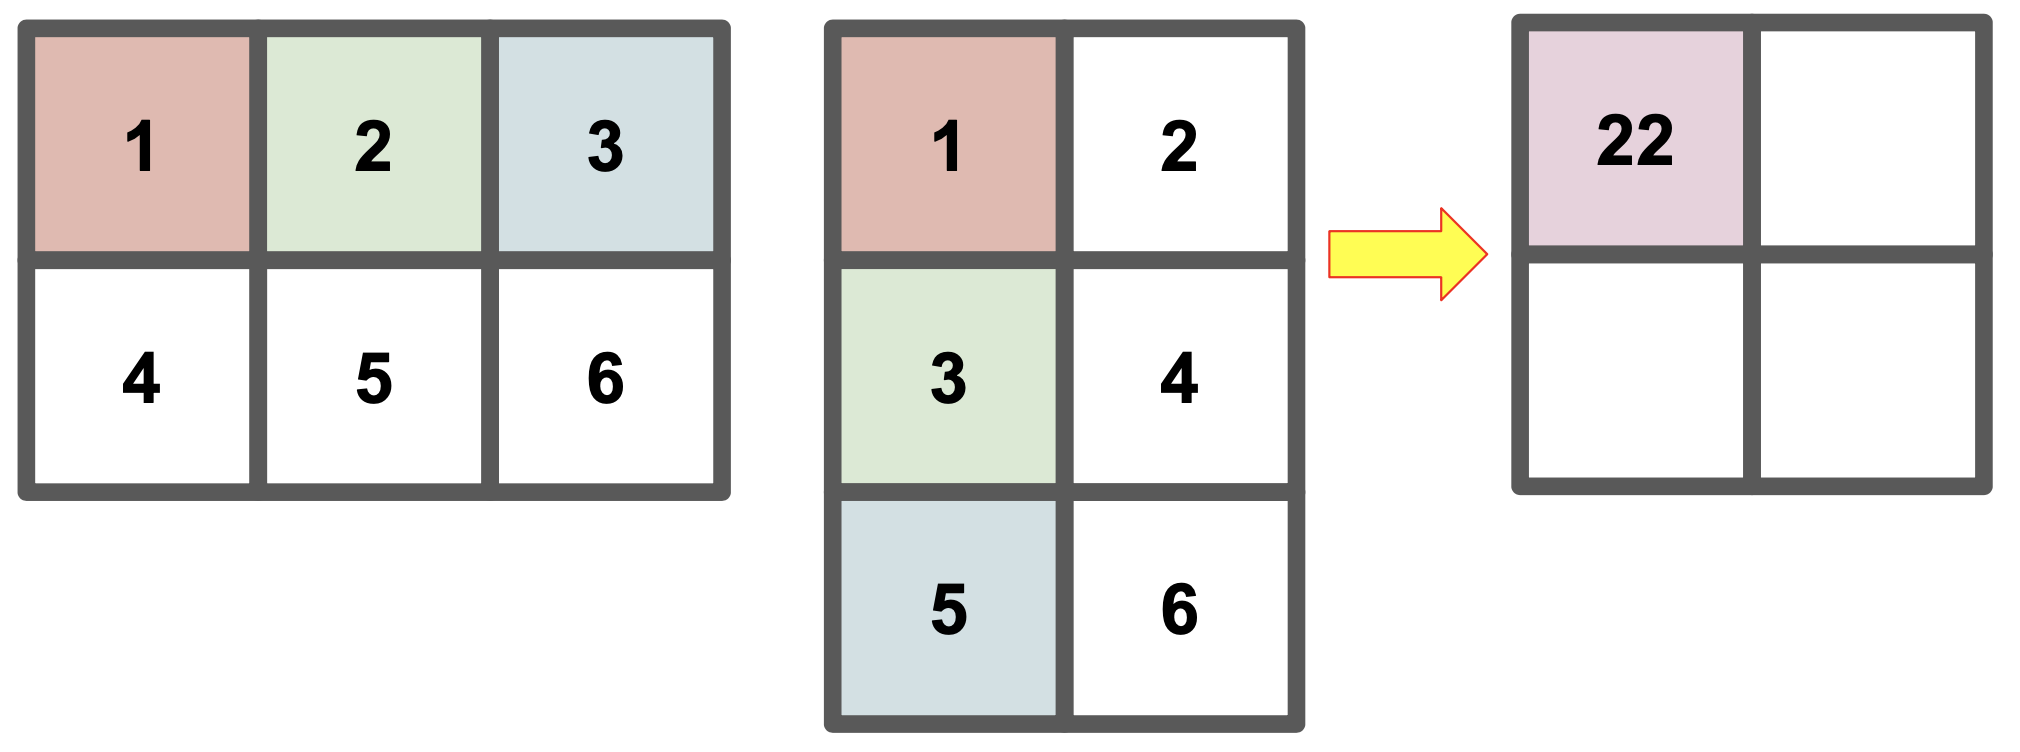

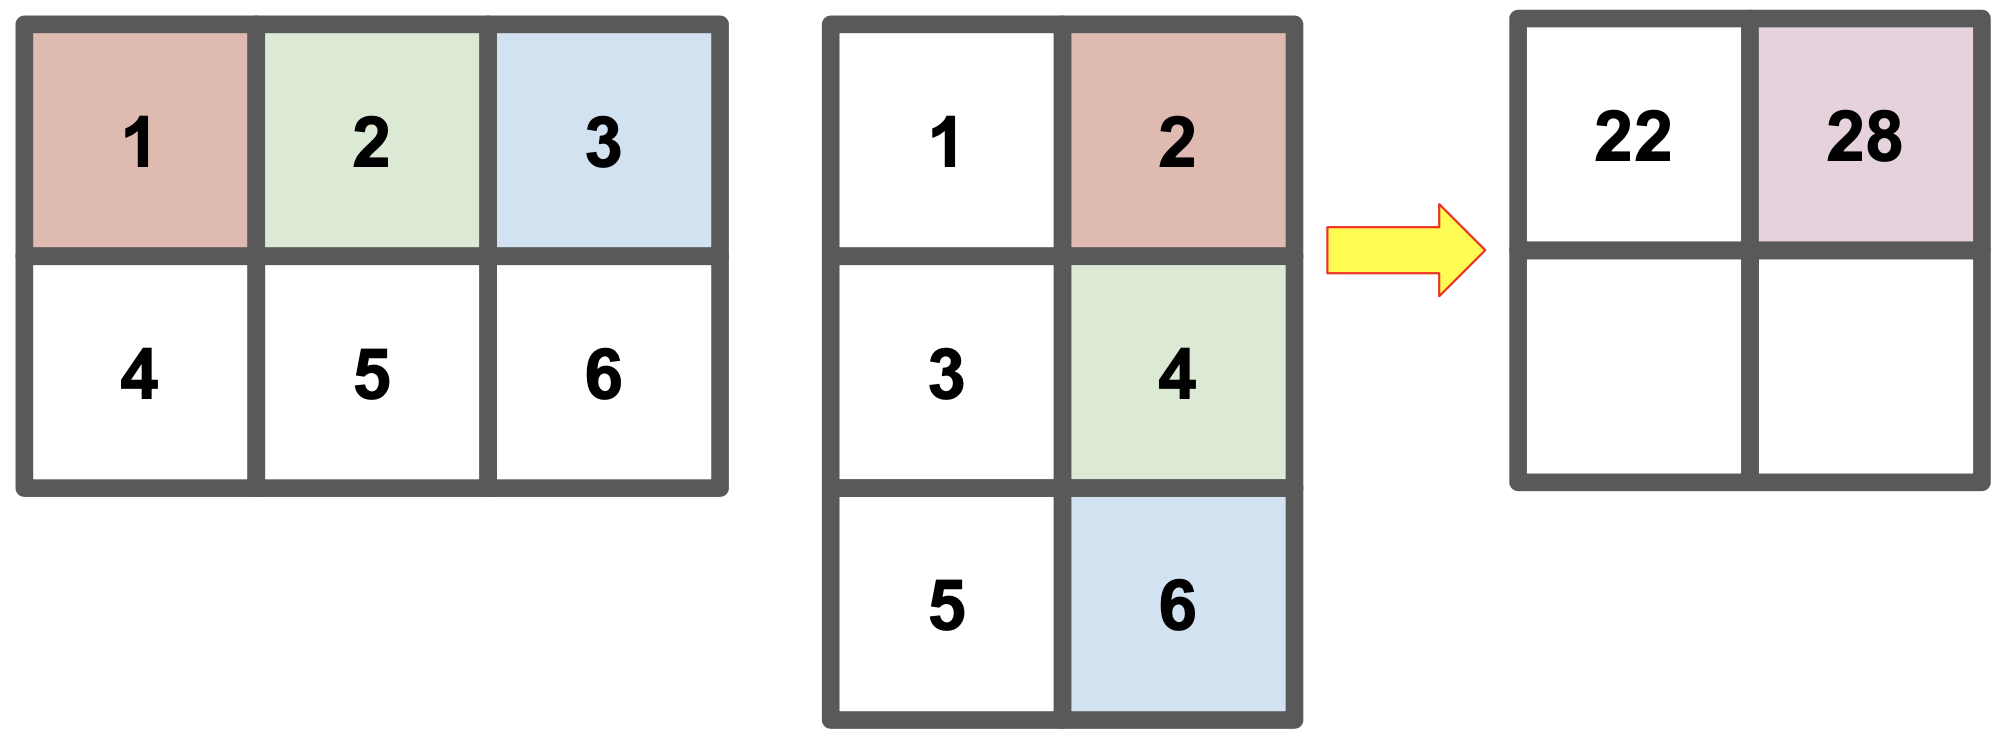

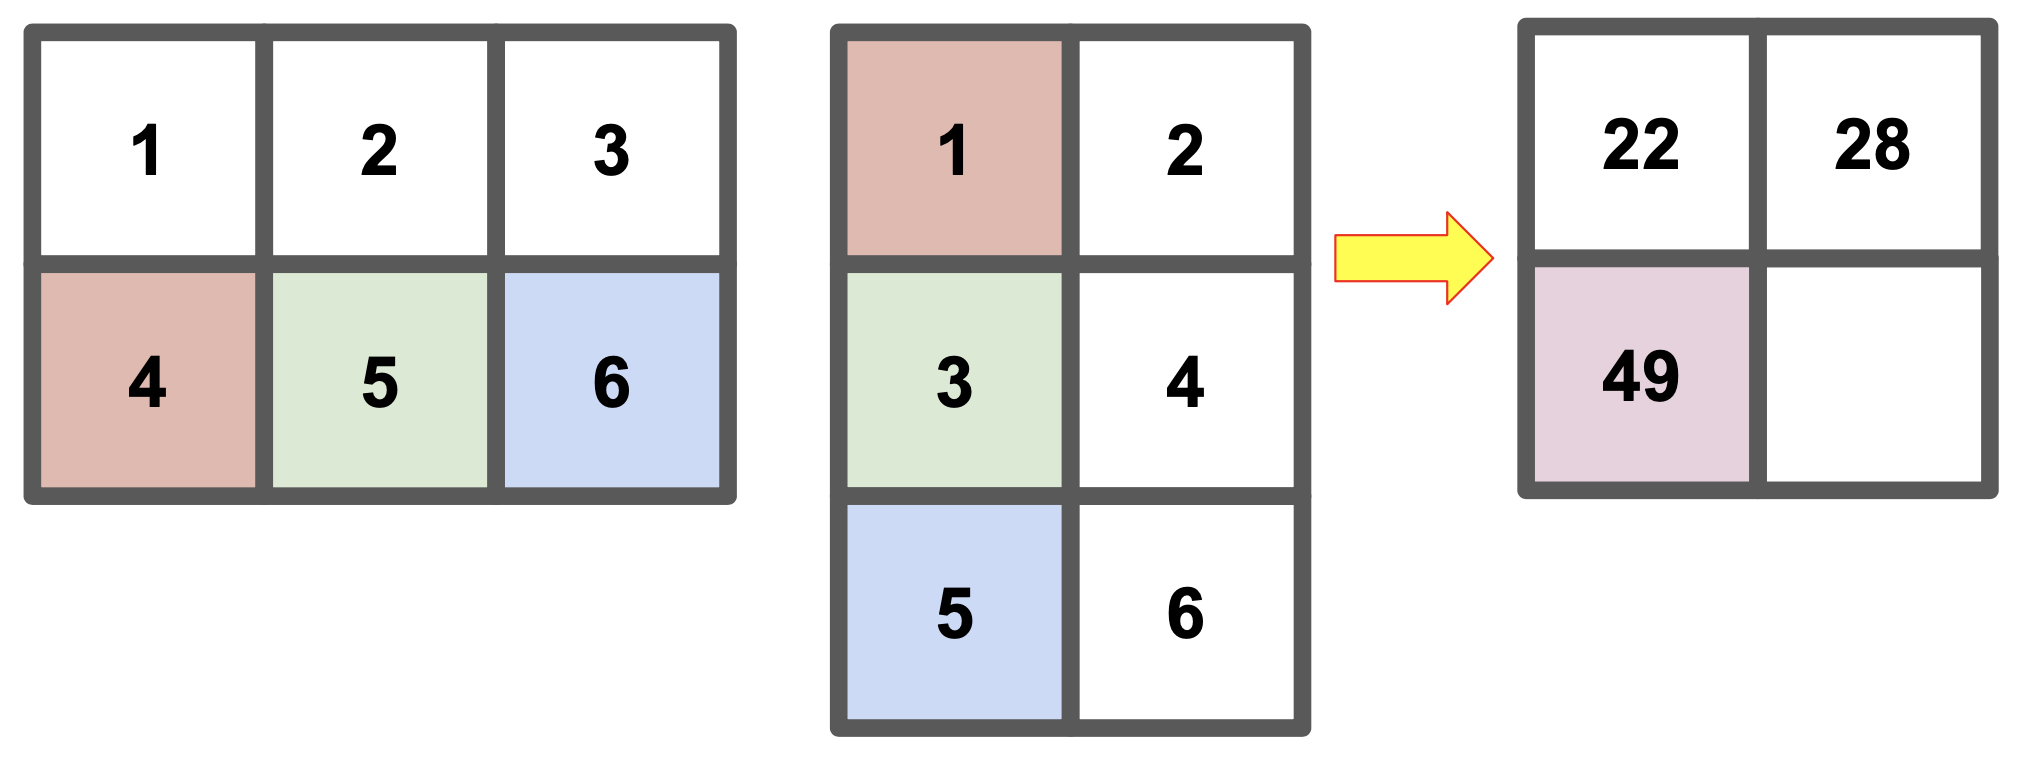

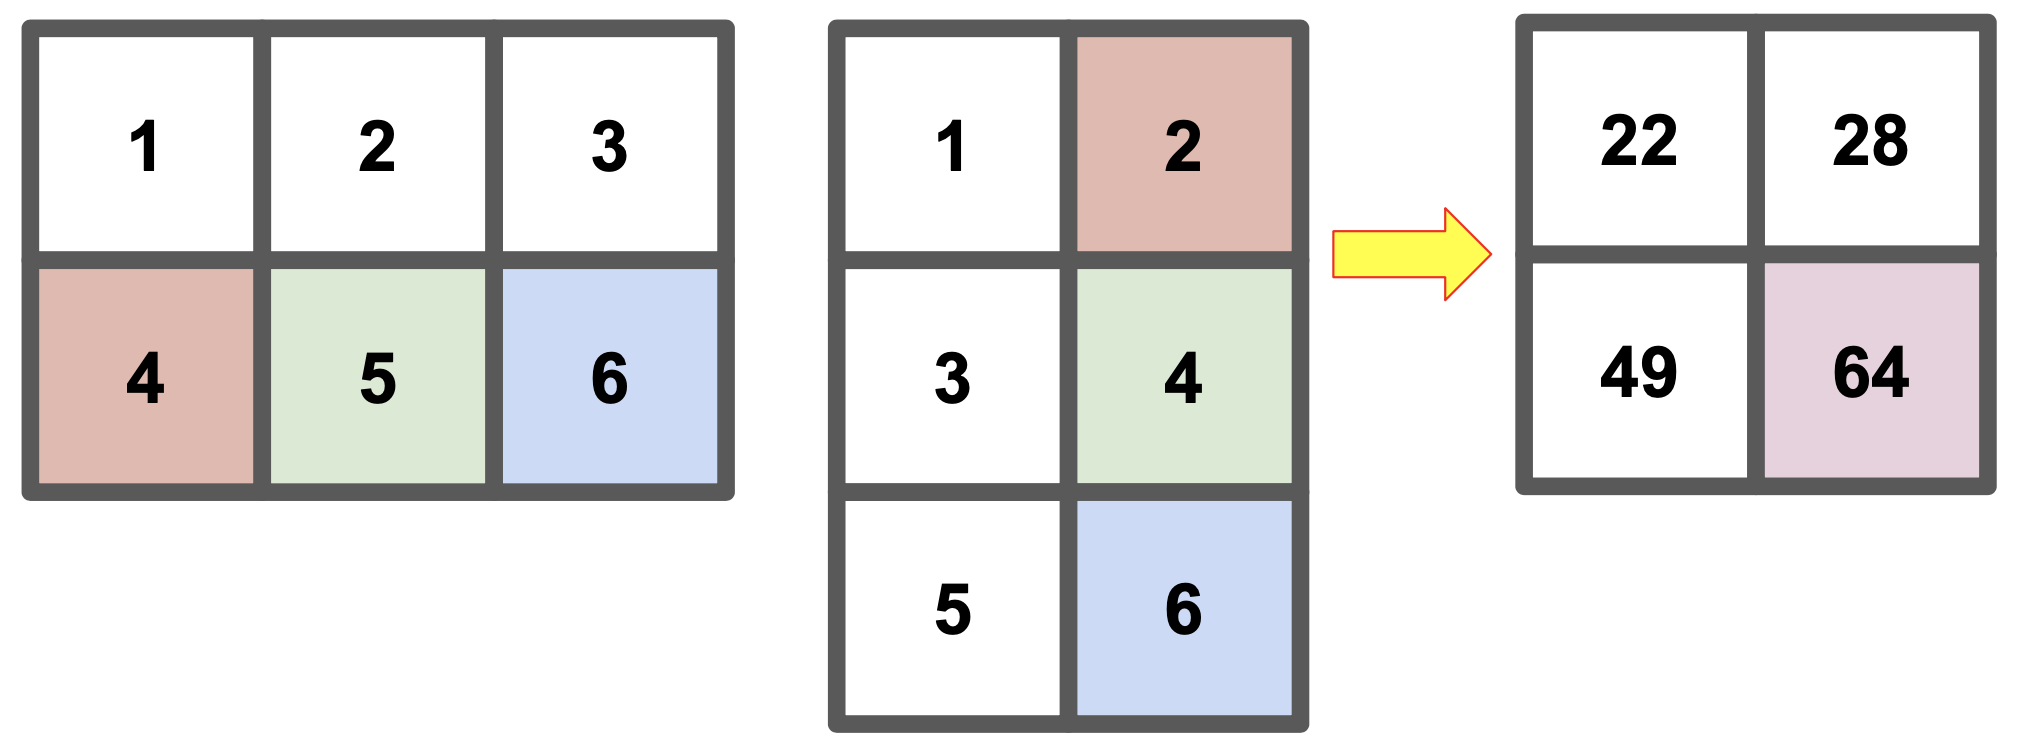

# **7. 딥러닝 모델 구성 및 결과 검증**

\- 런타임 -> 런타임 유형 변경

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

60000 60000
10000 10000


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
x_train[0].shape

(28, 28)

\- 정규화
- 결과 확인할 때 학습을 편하게, 정확도를 높이기 위해서 하는 것

In [6]:
# 바로 숫자를 써버리면 10도 데이터고 255도 데이터임.차이가 너무 크기 때문에 255에 학습에 편향될 가능성이 높다. 
# 그래서 255를 나눠줘서 데이터에 치중되지 않도록 어느정도 조정한 것임
x_train, x_test = x_train / 255.0, x_test / 255.0

\- 그림 그리기

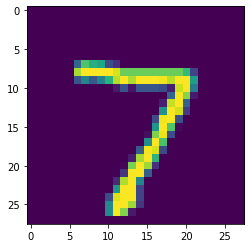

In [7]:
plt.imshow(x_test[0])

In [8]:
y_test[0]

7

\- 모델 작성

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),  # 128개로 이루어진 히든레이어를 만들어줌. 거기에 대한 활성화 함수는 relu이다
                                                  # relu는 해당 인풋값이 0보다 작으면 0을 그대로 출력, 0보다 크면 그 숫자를 그대로 출력하는 활성화 함수
  tf.keras.layers.Dropout(0.2),                   # 20% 정도는 생략하고 학습 -> 불충분한 데이터가 들어왔더라도 결과를 잘 도출해낼 수 있게 함
  tf.keras.layers.Dense(10, activation='softmax') # 0-9까지 분류. softmax는 카테고리에 관한 문제일 때 자주 사용됨
])

model.compile(optimizer='adam',       # optimizer : 학습을 좀 더 잘, 빨리 할 수 있도록 도와주는 옵션함수, adam이 가장 많이 사용됨
              loss='sparse_categorical_crossentropy',     # loss : 실측값과 예측값의 차이 .   이것을 어떻게 둘 것이냐. 
              metrics=['accuracy'])

\- 모델 시각화

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


\- 모델 학습 및 평가

In [11]:
model.fit(x_train, y_train, epochs = 5)         # 5번 학습

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2962 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0850 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9767


In [13]:
model.evaluate(x_test,  y_test, verbose = 2)

313/313 - 0s - loss: 0.0773 - accuracy: 0.9757 - 351ms/epoch - 1ms/step


[0.07728102058172226, 0.9757000207901001]